In [1]:
import pandas as pd
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('tweet_product_company.csv',encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df = df.drop(['emotion_in_tweet_is_directed_at'],axis=1)
df.rename(columns = {'tweet_text':'text','is_there_an_emotion_directed_at_a_brand_or_product':'emotion'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   emotion  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


In [4]:
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [5]:
def cvt_emotion(x):
    if x == "Negative emotion":
        return 0
    elif x == "Positive emotion":
        return 2
    else:
        return 1

In [6]:
df['emotion'] = df['emotion'].apply(lambda x: cvt_emotion(x))
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2
2,@swonderlin Can not wait for #iPad 2 also. The...,2
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,2


In [7]:
df.isnull().sum()

text       1
emotion    0
dtype: int64

In [8]:
df.dropna(subset = ['text'],inplace=True)
df.shape

(9092, 2)

In [9]:
df['text']= df['text'].apply(lambda x: x.lower())
df.head()

,text,emotion
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,0
1,@jessedee know about @fludapp ? awesome ipad/i...,2
2,@swonderlin can not wait for #ipad 2 also. the...,2
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,2


In [10]:
def contractions(s):
    s = re.sub(r"won't", "will not",s)
    s = re.sub(r"would't", "would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can't", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    return s
df['text']=df['text'].apply(lambda x:contractions(x))

In [11]:
df['text']= df['text'].apply(lambda x: re.sub("[^a-z]+"," ",x))
df.head()

,text,emotion
0,wesley i have a g iphone after hrs tweeting a...,0
1,jessedee know about fludapp awesome ipad ipho...,2
2,swonderlin can not wait for ipad also they sh...,2
3,sxsw i hope this year is festival is not as c...,0
4,sxtxstate great stuff on fri sxsw marissa may...,2


In [12]:
df['text']=df['text'].apply(lambda x: re.sub(' +', ' ', x))

In [13]:
stopwords_ = set(STOPWORDS)
Text = ""
for s in df['text']:
    s = str(s)
    s = s.strip()
    Text += (s + " ")

In [14]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_,
                min_font_size = 10).generate(Text)

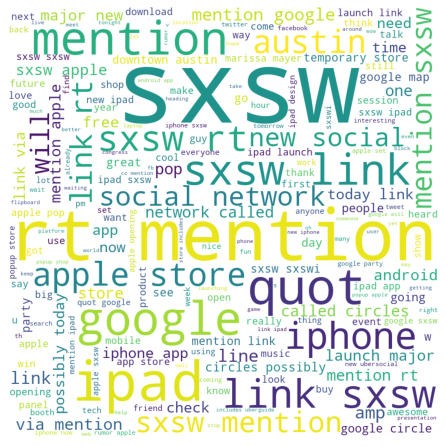

In [15]:
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [16]:
stop = nltk.corpus.stopwords.words('english')
df['text']=df['text'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [17]:
lemmatizer = WordNetLemmatizer()
df['text']=df['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
df.head()

,text,emotion
0,wesley g iphone hr tweeting rise austin dead n...,0
1,jessedee know fludapp awesome ipad iphone app ...,2
2,swonderlin wait ipad also sale sxsw,2
3,sxsw hope year festival crashy year iphone app...,0
4,sxtxstate great stuff fri sxsw marissa mayer g...,2


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=30)

In [19]:
len(X_train), len(X_test)

(7273, 1819)

In [20]:
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()

In [25]:
clf1.fit(tf_x_train,Y_train)

LogisticRegression()

In [26]:
clf1.score(tf_x_test,Y_test)

0.7003848268279275

In [27]:
y_pred = clf1.predict(tf_x_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.19       117
           1       0.72      0.88      0.79      1127
           2       0.63      0.46      0.54       575

    accuracy                           0.70      1819
   macro avg       0.78      0.48      0.50      1819
weighted avg       0.71      0.70      0.67      1819

